In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from rdkit import Chem

#### Import relevant libraries for data analysis and chemical structure processing
#### Analysis of the LRI and ELSIE datasets relative to TTC

In [2]:
from rdkit.Chem import Draw

In [3]:
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [4]:
#fp1 = AllChem.GetMorganFingerprintAsBitVect(m1,2,nBits=1024)
#fp2 = AllChem.GetMorganFingerprintAsBitVect(m2,2,nBits=1024)

In [5]:
import os

In [6]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
processed_dir = TOP + 'data/processed/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

#### Importing of relevant datasets: LRI and ELSIE. 
#### LRI provided by ongoing work that was published by Nelms et al (2019).
#### The ELSIE dataset was provided by D Rua as a word.doc file for which SMILES and DTXSID identifiers were identified from DSSTox and other public sources.

In [7]:
lri_smi = pd.read_csv(raw_dir+'LRI_TTC_updated_180719.csv')

In [8]:
elise =pd.read_excel(raw_dir+'ELISE_270919.xlsx', sheet_name = 'ELISE_updated')

In [9]:
elise.shape

(503, 10)

In [10]:
elise_v1 = elise[~elise['SMILES'].isnull()]

In [11]:
elise_v1.shape

(453, 10)

In [12]:
lri_smi.shape

(45038, 16)

#### A dictionary of the LRI and ELSIE datasets were made in order to compute Morgan fingerprints. These were then both projected into dataframes and concatenated together for dimensionality reduction using t-TSNE and UMAP. 

In [13]:
elise_dict ={k:Chem.MolFromSmiles(v) for k,v in zip(elise_v1['DTXSID'],elise_v1['SMILES'])}

#mydict = {k:v for k,v in zip(df['Name'], df['Smiles'])}
#mysmi ={k:Chem.MolFromSmiles(v)for k,v in mydict.items()}

In [14]:
elise_dict_v1 = {k: v for k, v in elise_dict.items() if v is not None}

In [15]:
len(elise_dict_v1)

442

In [16]:
elise_mgrn = {k: AllChem.GetMorganFingerprintAsBitVect(v,3,nBits=2048) for k,v in elise_dict_v1.items()}

In [17]:
np_fps = []
for k,v in elise_mgrn.items():
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(v,arr)
    np_fps.append(arr)

In [18]:
elise_mgrn_df = pd.DataFrame(np_fps)
elise_mgrn_df.columns=elise_mgrn_df.columns + 1
elise_mgrn_df.index = [k for k in elise_mgrn.keys()]

In [19]:
elise_mgrn_df.shape

(442, 2048)

In [20]:
lri_dict = {k:Chem.MolFromSmiles(v) for k,v in zip(lri_smi['DTXSID'],lri_smi['smiles'])}

RDKit WARNING: [17:55:46] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:55:46] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:55:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:55:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:55:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:55:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:55:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:55:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:55:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:55:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:55:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:55:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:55:47] WARNING: not r

In [21]:
len(list(lri_dict.items()))

45038

In [22]:
test = {k:v for k,v in lri_dict.items() if v is not None}

In [23]:
lri_mgrn = {k: AllChem.GetMorganFingerprintAsBitVect(v,3,nBits=2048) for k,v in test.items()}

In [24]:
len(list(lri_mgrn.items()))

45037

In [25]:
np_fps2 = []
for k,v in lri_mgrn.items():
    arr2 = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(v,arr2)
    np_fps2.append(arr2)

In [26]:
lri_mgrn_df = pd.DataFrame(np_fps2)
lri_mgrn_df.columns=lri_mgrn_df.columns + 1
lri_mgrn_df.index = [k for k in lri_mgrn.keys()]

In [27]:
lri_mgrn_df.head()

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
DTXSID6020561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID9020453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID3034456,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID2024242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID4032376,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
lri_mgrn_df['Source'] = 'LRI'
elise_mgrn_df['Source'] = 'ELSIE'

In [29]:
lri_elsie =pd.concat([lri_mgrn_df, elise_mgrn_df], axis =0)

In [30]:
from sklearn.feature_selection import VarianceThreshold

In [31]:
sel = VarianceThreshold(threshold = (0*(1-0)))
X = sel.fit_transform(lri_elsie.iloc[:,0:2048])

In [32]:
X_df = lri_elsie.iloc[:,0:2048][lri_elsie.iloc[:,0:2048].columns[sel.get_support(indices=True)]]

In [33]:
lri_elsie.to_csv(processed_dir+'lri_elsie_mgrn_011121.csv')

In [34]:
#lri_elsie.rename(columns = {'Unnamed: 0': 'DTXSID'}, inplace = True)
#lri_elsie = lri_elsie.set_index('DTXSID')

In [35]:
lri_elsie.shape

(45479, 2049)

In [36]:
lri_elsie.head()

,1,2,3,4,5,6,7,8,9,10,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,Source
DTXSID6020561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LRI
DTXSID9020453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LRI
DTXSID3034456,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LRI
DTXSID2024242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LRI
DTXSID4032376,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LRI


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(lri_elsie.iloc[:,0:2048], lri_elsie.iloc[:,2048], test_size=0.1, stratify=lri_elsie.iloc[:,2048])

In [39]:
X_test.shape

(4548, 2048)

In [40]:
from sklearn.manifold import TSNE

In [41]:
model_mgrn = TSNE(learning_rate = 200)

In [42]:
tsne_features = model_mgrn.fit_transform(X_test)

In [43]:
tsne_df=pd.concat([pd.DataFrame(tsne_features, index = X_test.index, columns = ['tsne_x', 'tsne_y']), y_test],axis =1)

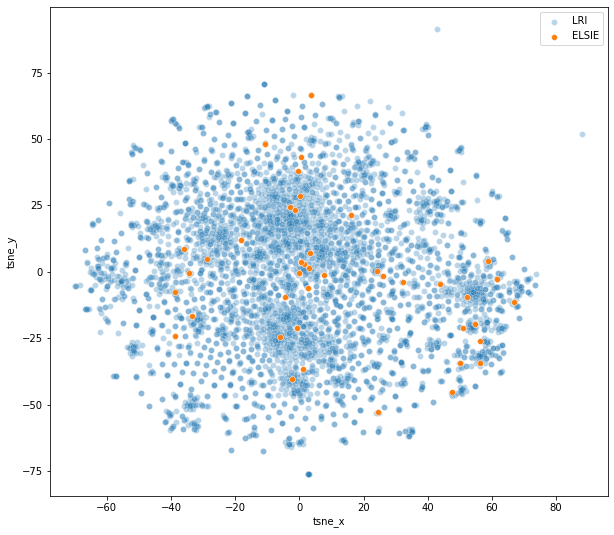

In [44]:
fig, ax = plt.subplots(figsize = (10,9))
tsne_df['alpha'] = np.where(tsne_df.Source == 'LRI', 0.3,1)
alphas = tsne_df.alpha.sort_values().unique()
ax = sns.scatterplot(x="tsne_x", y="tsne_y",
                     data=tsne_df[tsne_df.alpha == alphas[0]], alpha=alphas[0], label = 'LRI')
for alpha in alphas[1:]:
    sns.scatterplot(x="tsne_x", y="tsne_y",
                    data=tsne_df[tsne_df.alpha == alpha], alpha=alpha, ax=ax,label = 'ELSIE')
plt.legend()

#plt.title('2D Visualisation of the ELSIE vs LRI Landscape')
plt.savefig(figures_dir+'Mgrn_2D_Landscape_011121.png', dpi = 300)

In [48]:
import umap

#### Testing out the functionality of the UMAP approach using the iris dataset as an example

In [73]:
from sklearn.datasets import load_iris

In [74]:
iris = load_iris()

In [75]:
#iris.data

In [76]:
reducer = umap.UMAP()

In [77]:
embedding = reducer.fit_transform(iris.data)

In [78]:
embedding.shape

(150, 2)

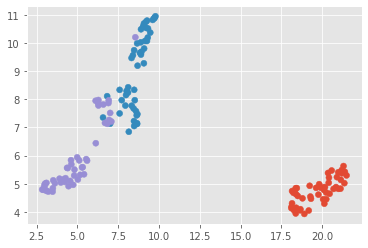

In [79]:
plt.style.use('ggplot')
plt.scatter(embedding[:,0], embedding[:,1], c= [sns.color_palette()[x] for x in iris.target])

In [80]:


#lri_elsie.iloc[:,:2048]

#### Applying the UMAP approach to the full dataset with Morgan fingerprints. 

In [49]:
reducer = umap.UMAP()

In [ ]:
umap_features = reducer.fit_transform(lri_elsie.iloc[:,:2048].values)

In [83]:
umap_features.shape

(45455, 2)

In [84]:
umap_df=pd.concat([pd.DataFrame(umap_features, index = lri_elsie.index, columns = ['umap_x', 'umap_y']), lri_elsie.iloc[:,2048]],axis =1)

In [85]:
umap_df.to_csv(processed_dir+'lri_elsie_mgrn_umap.csv')

#### Approached worked by due to the high number of substances in the LRI inventory, it is impossible to discern membership in the ELSIE dataset

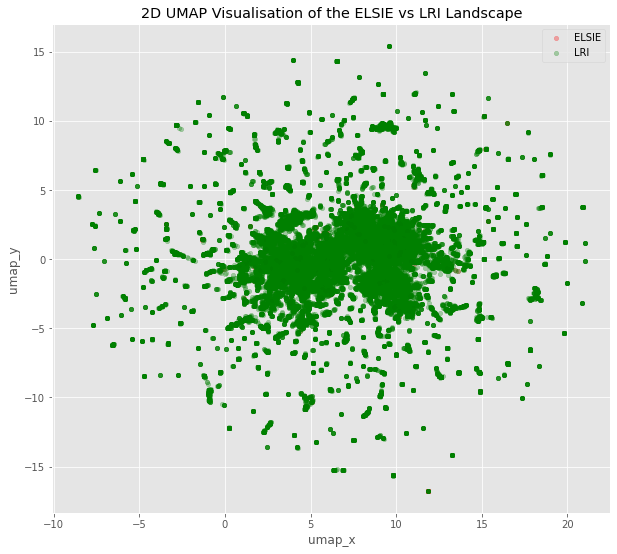

In [86]:
fig, ax = plt.subplots(figsize = (10,9))

colors = {'ELSIE':'red','LRI':'green' }

grouped = umap_df.groupby('Source')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='umap_x', y='umap_y', label=key, color=colors[key],alpha = 0.3)
plt.title('2D UMAP Visualisation of the ELSIE vs LRI Landscape')
plt.savefig(figures_dir+'Mrgn_UMAP_2D_Landscape.png')

#### Trying out ways of changing the transparency of one category relative to the other to faciliate visualisation.

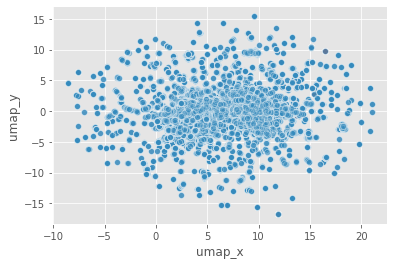

In [87]:
umap_df['alpha'] = np.where(umap_df.Source == 'LRI', 0.3,1)
ax = sns.scatterplot(x = 'umap_x', y = 'umap_y', data = umap_df[umap_df.alpha == 1], alpha = 1)
sns.scatterplot(x = 'umap_x', y = 'umap_y', data = umap_df[umap_df.alpha == 0.3], alpha = 0.3, ax = ax)





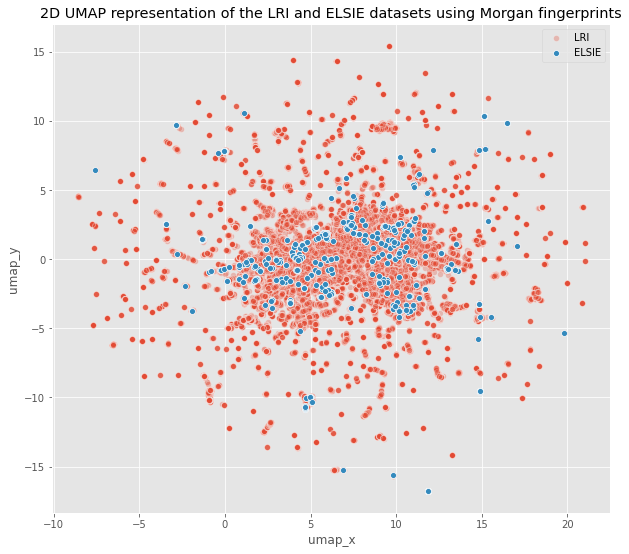

In [88]:
plt.style.use('ggplot')
plt.figure(figsize = (10,9))
alphas = umap_df.alpha.sort_values().unique()
ax = sns.scatterplot(x="umap_x", y="umap_y",
                     data=umap_df[umap_df.alpha == alphas[0]], alpha=alphas[0], label = 'LRI')
for alpha in alphas[1:]:
    sns.scatterplot(x="umap_x", y="umap_y",
                    data=umap_df[umap_df.alpha == alpha], alpha=alpha, ax=ax,label = 'ELSIE')
plt.legend()
plt.title('2D UMAP representation of the LRI and ELSIE datasets using Morgan fingerprints')
plt.savefig(figures_dir+'Mrgn_UMAP_2D_Landscape.png')

In [89]:
lri_elise_tps= pd.read_csv(processed_dir+'lri_elise_tps_df.csv')

In [90]:
lri_elise_tps = lri_elise_tps.set_index('DTXSID')

In [91]:
lri_elise_tps.iloc[:,:729].head()

,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,bond:C#N_cyano_cyanohydrin,...,ring:polycycle_bicyclo_propene,ring:polycycle_spiro_[2.2]pentane,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene
DTXSID,,,,,,,,,,,,,,,,,,,,,
DTXSID6020561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID9020453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID3034456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID2024242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID4032376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
umap_features_tps = reducer.fit_transform(lri_elise_tps.iloc[:,:729].values)

/home/grace/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/umap/spectral.py:228: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


In [93]:
lri_elise_tps.iloc[:,729].head()

DTXSID
DTXSID6020561    LRI
DTXSID9020453    LRI
DTXSID3034456    LRI
DTXSID2024242    LRI
DTXSID4032376    LRI
Name: Source, dtype: object

In [94]:
umap_tp_df=pd.concat([pd.DataFrame(umap_features_tps, index = lri_elise_tps.index, columns = ['umap_x', 'umap_y']), lri_elise_tps.iloc[:,729]],axis =1)

In [95]:
umap_tp_df['alpha'] = np.where(umap_tp_df.Source == 'LRI', 0.3,1)

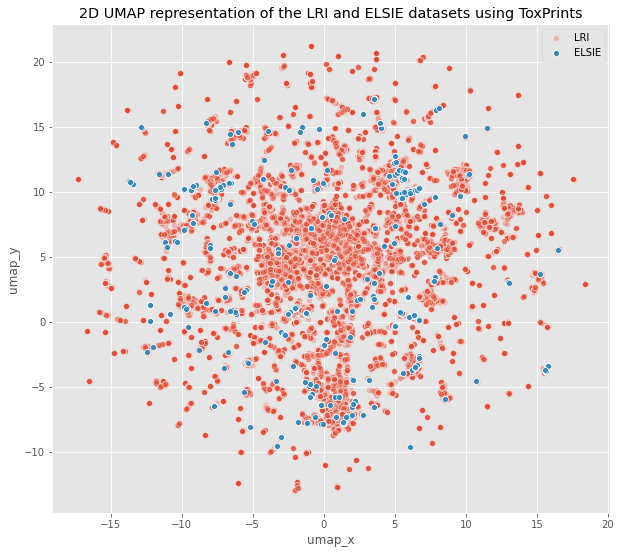

In [96]:
plt.style.use('ggplot')
plt.figure(figsize = (10,9))
alphas = umap_tp_df.alpha.sort_values().unique()
ax = sns.scatterplot(x="umap_x", y="umap_y",
                     data=umap_tp_df[umap_tp_df.alpha == alphas[0]], alpha=alphas[0], label = 'LRI')
for alpha in alphas[1:]:
    sns.scatterplot(x="umap_x", y="umap_y",
                    data=umap_tp_df[umap_tp_df.alpha == alpha], alpha=alpha, ax=ax,label = 'ELSIE')
plt.legend()
plt.title('2D UMAP representation of the LRI and ELSIE datasets using ToxPrints')
plt.savefig(figures_dir+'TxP_UMAP_2D_Landscape.png')

In [97]:
umap_tp_df.to_csv(processed_dir+'TxP_UMAP_df.csv')

In [98]:
lri_elise_tps.shape

(45467, 730)

#### ToxPrint enrichment analysis for the full dataset. Enrichments were computed for both datasets.

In [52]:
import scipy.stats as stats

In [51]:
df = pd.get_dummies(lri_elise_tps, columns=['Source'])

In [58]:
#df.iloc[:,729]

In [61]:
res = []
for i, column in df.iloc[:,:729].iteritems():
    if pd.crosstab(df.iloc[:,729],column).shape == (2,2):
        a = pd.crosstab(df.iloc[:,729],column)
        tn, fn, fp, tp = a.iloc[0,0], a.iloc[0,1], a.iloc[1,0], a.iloc[1,1]
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(df.iloc[:,729],column))
        res.append([oddsratio, pvalue, i, tp])

In [62]:
res2 = []
for i, column in df.iloc[:,:729].iteritems():
    if pd.crosstab(df.iloc[:,730],column).shape == (2,2):
        a = pd.crosstab(df.iloc[:,730],column)
        tn, fn, fp, tp = a.iloc[0,0], a.iloc[0,1], a.iloc[1,0], a.iloc[1,1]
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(df.iloc[:,730],column))
        res2.append([oddsratio, pvalue, i, tp])

In [66]:
def convert(lst):
    lst_df = pd.DataFrame(lst, columns = ['OR', 'p', 'ToxPrint', 'TP'])
    lst_df = lst_df.sort_values(by = ['OR', 'p', 'TP'], ascending = [False, True, False])
    
    return lst_df

In [67]:
elsie_or = convert(res)

In [68]:
lri_or = convert(res2)

In [73]:
def enriched(mydf):
    enrich_df = mydf[(mydf['OR'] >= 3) & (mydf['TP'] >= 3) & (mydf['p'] <= 0.05)]
    enrich_df = enrich_df.sort_values(by = ['OR', 'p', 'TP'], ascending = [False, True, False])
    return enrich_df

In [74]:
elsie_enriched = enriched(elsie_or)
lri_enriched = enriched(lri_or)

In [76]:
elsie_enriched.shape

(32, 4)

In [77]:
lri_enriched.shape

(110, 4)

In [81]:
#elsie_enriched

In [84]:
writer = pd.ExcelWriter(processed_dir+'enrichments_LRI_ELSIE.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
elsie_enriched.to_excel(writer, sheet_name = 'elsie_enriched_TxPs')
lri_enriched.to_excel(writer, sheet_name = 'LRI_enriched_TxPs')

writer.save()